In [35]:
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 1. Гиперпараметры

In [46]:
df_main = pd.read_csv('Data/Lessons/data/titanic/train.csv')
Y = df_main['Survived']
X = df_main.loc[:, df_main.columns != 'Survived']

In [327]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size = 0.2, random_state=1)
X_train, X_valid, Y_train, Y_valid = train_test_split(X_train, Y_train,test_size = 0.2, random_state=1)

In [55]:
X_valid

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
693,694,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
124,125,1,"White, Mr. Percival Wayland",male,54.0,0,1,35281,77.2875,D26,S
770,771,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
311,312,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
...,...,...,...,...,...,...,...,...,...,...,...
229,230,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
731,732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C
227,228,3,"Lovell, Mr. John Hall (""Henry"")",male,20.5,0,0,A/5 21173,7.2500,NaN,S
751,752,3,"Moor, Master. Meier",male,6.0,0,1,392096,12.4750,E121,S


In [328]:
X_train = X_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
X_valid = X_valid.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)
X_test = X_test.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

In [329]:
def prepare_num(df):
    df_num = df.drop(['Sex', 'Embarked', 'Pclass'], axis=1)
    df_sex = pd.get_dummies(df['Sex'])
    df_emb = pd.get_dummies(df['Embarked'], prefix='Emb')
    df_pcl = pd.get_dummies(df['Pclass'], prefix='Pclass')

    df_num = pd.concat((df_num, df_sex, df_emb, df_pcl), axis=1)
    return df_num

In [330]:
X_train = prepare_num(X_train)
X_valid = prepare_num(X_valid)
X_test = prepare_num(X_test)
X_test = X_test.fillna(X.median())
X_valid = X_valid.fillna(X.median())
X_train = X_train.fillna(X.median())

In [331]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(X_train)
x_valid = scaler.transform(X_valid)
x_test = scaler.transform(X_test)

1.1 K-NN

In [169]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train,Y_train)
y_predict = model_knn.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.8041958041958042


In [170]:
model_knn = KNeighborsClassifier(n_neighbors=5, weights='distance', p = 2)
model_knn.fit(x_train,Y_train)
y_predict = model_knn.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7972027972027972


In [171]:
model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p = 2)
model_knn.fit(x_train,Y_train)
y_predict = model_knn.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.8111888111888111


In [172]:
model_knn = KNeighborsClassifier(n_neighbors=30, weights='distance', p = 1)
model_knn.fit(x_train,Y_train)
y_predict = model_knn.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7972027972027972


In [174]:
model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p = 2)
model_knn.fit(x_train,Y_train)
y_predict = model_knn.predict(x_test)
print("accuracy_test:", accuracy_score(y_predict, Y_test))

accuracy_test: 0.8156424581005587


1.2 Logistic Regression

In [181]:
model_log_reg = LogisticRegression(penalty = 'none',C=1,solver = 'lbfgs')
model_log_reg.fit(x_train,Y_train)
y_predict = model_log_reg.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7902097902097902


In [176]:
model_log_reg = LogisticRegression(penalty = 'l2',C=0.6,solver = 'newton-cg')
model_log_reg.fit(x_train,Y_train)
y_predict = model_log_reg.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7762237762237763


In [177]:
model_log_reg = LogisticRegression(penalty = 'l1',C=1,solver = 'liblinear')
model_log_reg.fit(x_train,Y_train)
y_predict = model_log_reg.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7692307692307693


In [178]:
model_log_reg = LogisticRegression(penalty = 'none',C=0.3,solver = 'saga')
model_log_reg.fit(x_train,Y_train)
y_predict = model_log_reg.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7902097902097902


In [179]:
model_log_reg = LogisticRegression(penalty = 'none',C=0.6,solver = 'lbfgs')
model_log_reg.fit(x_train,Y_train)
y_predict = model_log_reg.predict(x_test)
print("accuracy_test:", accuracy_score(y_predict, Y_test))

accuracy_test: 0.7932960893854749


1.3 XGBoost

In [215]:
model_xgboost = XGBClassifier(n_estimators=30, max_depth=4,learning_rate = 0.35)
model_xgboost.fit(x_train,Y_train)
y_predict = model_xgboost.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7972027972027972


In [231]:
model_xgboost = XGBClassifier(n_estimators=9, max_depth=4,learning_rate = 0.5)
model_xgboost.fit(x_train,Y_train)
y_predict = model_xgboost.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.8461538461538461


In [217]:
model_xgboost = XGBClassifier(n_estimators=100, max_depth=4,learning_rate = 0.9)
model_xgboost.fit(x_train,Y_train)
y_predict = model_xgboost.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7902097902097902


In [235]:
model_xgboost = XGBClassifier(n_estimators=9, max_depth=4,learning_rate = 0.5)
model_xgboost.fit(x_train,Y_train)
y_predict = model_xgboost.predict(x_test)
print("accuracy_test:", accuracy_score(y_predict, Y_test))

accuracy_test: 0.776536312849162


1.4 Random forest

In [236]:
model_rand_forest = RandomForestClassifier(n_estimators=20, max_depth=4, criterion='entropy')
model_rand_forest.fit(x_train,Y_train)
y_predict = model_rand_forest.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.7902097902097902


In [243]:
model_rand_forest = RandomForestClassifier(n_estimators=200, max_depth=4, criterion='entropy')
model_rand_forest.fit(x_train,Y_train)
y_predict = model_rand_forest.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.8111888111888111


In [254]:
model_rand_forest = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')
model_rand_forest.fit(x_train,Y_train)
y_predict = model_rand_forest.predict(x_valid)
print("accuracy_valid:", accuracy_score(y_predict, Y_valid))

accuracy_valid: 0.8111888111888111


In [255]:
model_rand_forest = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')
model_rand_forest.fit(x_train,Y_train)
y_predict = model_rand_forest.predict(x_test)
print("accuracy_test:", accuracy_score(y_predict, Y_test))

accuracy_test: 0.776536312849162


# 2. Важные признаки

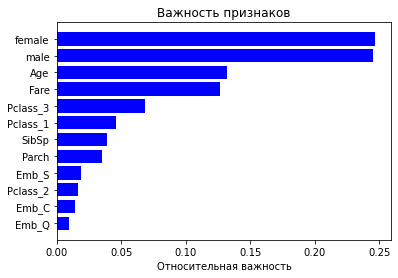

In [332]:
model_rand_forest = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')
model_rand_forest.fit(x_train,Y_train)

importances = model_rand_forest.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.title('Важность признаков')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Относительная важность')
plt.show()

 2.1. 2 самых важных

In [333]:
feature2 = features[indices][-2:]
X_train2 = X_train[feature2]
X_test2 = X_test[feature2]

In [345]:
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(X_train2)
x_test2 = scaler.transform(X_test2)

In [336]:
model_rand_forest = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')
model_rand_forest.fit(x_train2,Y_train)
y_predict = model_rand_forest.predict(x_test2)
print("rand_forest accuracy_test:", accuracy_score(y_predict, Y_test))

rand_forest accuracy_test: 0.776536312849162


In [350]:
model_xgboost = XGBClassifier(n_estimators=9, max_depth=4,learning_rate = 0.5)
model_xgboost.fit(x_train2,Y_train)
y_predict = model_xgboost.predict(x_test2)
print("xgboost accuracy_test:", accuracy_score(y_predict, Y_test))

xgboost accuracy_test: 0.776536312849162


In [340]:
model_log_reg = LogisticRegression(penalty = 'none',C=0.6,solver = 'lbfgs')
model_log_reg.fit(x_train2,Y_train)
y_predict = model_log_reg.predict(x_test2)
print("log_reg accuracy_test:", accuracy_score(y_predict, Y_test))

log_reg accuracy_test: 0.776536312849162


In [342]:
model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p = 2)
model_knn.fit(x_train2,Y_train)
y_predict = model_knn.predict(x_test2)
print("knn accuracy_test:", accuracy_score(y_predict, Y_test))

knn accuracy_test: 0.776536312849162


 2.2. 4 самых важных

In [347]:
feature4 = features[indices][-4:]
X_train4 = X_train[feature4]
X_test4 = X_test[feature4]

In [348]:
x_train4 = scaler.fit_transform(X_train4)
x_test4 = scaler.transform(X_test4)

In [349]:
model_rand_forest = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')
model_rand_forest.fit(x_train4,Y_train)
y_predict = model_rand_forest.predict(x_test4)
print("rand_forest accuracy_test:", accuracy_score(y_predict, Y_test))

rand_forest accuracy_test: 0.8044692737430168


In [351]:
model_xgboost = XGBClassifier(n_estimators=9, max_depth=4,learning_rate = 0.5)
model_xgboost.fit(x_train4,Y_train)
y_predict = model_xgboost.predict(x_test4)
print("xgboost accuracy_test:", accuracy_score(y_predict, Y_test))

xgboost accuracy_test: 0.776536312849162


In [352]:
model_log_reg = LogisticRegression(penalty = 'none',C=0.6,solver = 'lbfgs')
model_log_reg.fit(x_train4,Y_train)
y_predict = model_log_reg.predict(x_test4)
print("log_reg accuracy_test:", accuracy_score(y_predict, Y_test))

log_reg accuracy_test: 0.7821229050279329


In [353]:
model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p = 2)
model_knn.fit(x_train4,Y_train)
y_predict = model_knn.predict(x_test4)
print("knn accuracy_test:", accuracy_score(y_predict, Y_test))

knn accuracy_test: 0.7430167597765364


2.3. 8 самых важных

In [354]:
feature8 = features[indices][-8:]
X_train8 = X_train[feature8]
X_test8 = X_test[feature8]

In [355]:
x_train8 = scaler.fit_transform(X_train8)
x_test8 = scaler.transform(X_test8)

In [356]:
model_rand_forest = RandomForestClassifier(n_estimators=100, max_depth=6, criterion='gini')
model_rand_forest.fit(x_train8,Y_train)
y_predict = model_rand_forest.predict(x_test8)
print("rand_forest accuracy_test:", accuracy_score(y_predict, Y_test))

rand_forest accuracy_test: 0.7877094972067039


In [357]:
model_xgboost = XGBClassifier(n_estimators=9, max_depth=4,learning_rate = 0.5)
model_xgboost.fit(x_train8,Y_train)
y_predict = model_xgboost.predict(x_test8)
print("xgboost accuracy_test:", accuracy_score(y_predict, Y_test))

xgboost accuracy_test: 0.8100558659217877


In [358]:
model_log_reg = LogisticRegression(penalty = 'none',C=0.6,solver = 'lbfgs')
model_log_reg.fit(x_train8,Y_train)
y_predict = model_log_reg.predict(x_test8)
print("log_reg accuracy_test:", accuracy_score(y_predict, Y_test))

log_reg accuracy_test: 0.7988826815642458


In [359]:
model_knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', p = 2)
model_knn.fit(x_train8,Y_train)
y_predict = model_knn.predict(x_test8)
print("knn accuracy_test:", accuracy_score(y_predict, Y_test))

knn accuracy_test: 0.7821229050279329


# 3. Кластеризация

In [1]:
from sklearn.cluster import KMeans

In [3]:
wells_info_df = pd.read_csv("wells_info.csv")

In [5]:
data = wells_info_df[['BottomHoleLatitude','BottomHoleLongitude']]

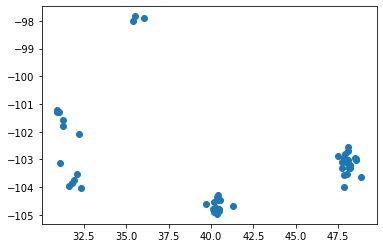

In [20]:
plt.scatter(data['BottomHoleLatitude'],data['BottomHoleLongitude'])

3.1 K-means

In [33]:
crit = []
for i in range(2,8):
    kmeans = KMeans(n_clusters=i,random_state = 1)
    kmeans.fit(data)
    crit.append(kmeans.inertia_)

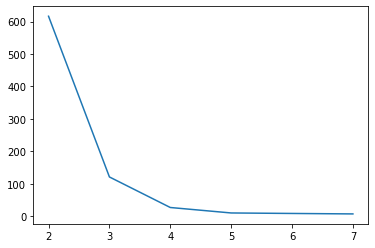

In [34]:
plt.plot(range(2,8), crit)

In [24]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data)

KMeans(n_clusters=5)

In [25]:
labels = kmeans.labels_

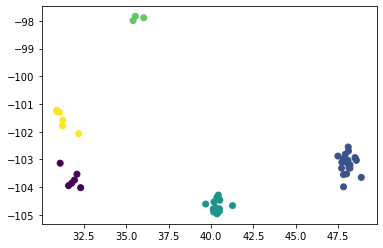

In [26]:
plt.scatter(data['BottomHoleLatitude'],data['BottomHoleLongitude'], c=labels)

3.2 DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

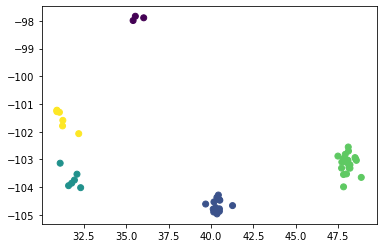

In [64]:
dbscan = DBSCAN(eps = 1, min_samples=5)
dbscan.fit(data)
labels = dbscan.labels_
plt.scatter(data['BottomHoleLatitude'],data['BottomHoleLongitude'], c=labels)

3.3 MeanShift

In [66]:
from sklearn.cluster import MeanShift

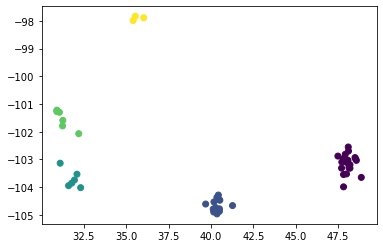

In [70]:
mean_shift = MeanShift(bandwidth=1)
mean_shift.fit(data)
labels = mean_shift.labels_
plt.scatter(data['BottomHoleLatitude'],data['BottomHoleLongitude'], c=labels)

3.4 Birch

In [71]:
from sklearn.cluster import Birch

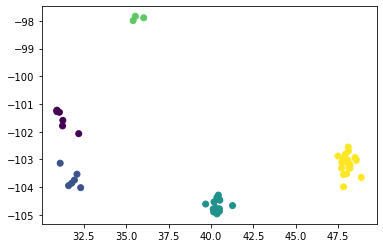

In [73]:
birch = Birch(n_clusters = 5)
birch.fit(data)
labels = birch.labels_
plt.scatter(data['BottomHoleLatitude'],data['BottomHoleLongitude'], c=labels)

# 4.t-SNE

In [74]:
wells_info_with_prod = pd.read_csv('wells_info_with_prod.csv')
wells_info_with_prod

,API,PermitDate,SpudDate,CompletionDate,FirstProductionDate,operatorNameIHS,formation,BasinName,StateName,CountyName,LatWGS84,LonWGS84,BottomHoleLatitude,BottomHoleLongitude,LATERAL_LENGTH_BLEND,PROP_PER_FOOT,WATER_PER_FOOT,Prod1Year,ProdAll
0,5005072170100,2014-05-06,2014-05-06,2014-12-02,2014-11-01 00:00:00.000,BURLINGTON RESOURCES O&G CO LP,NIOBRARA,DENVER BASIN,COLORADO,ARAPAHOE,39.684606,-104.642128,39.68445,-104.60557,9005.0,994.6866,591.800400,126898,201325
1,5123377130000,2013-07-21,2013-10-06,2014-02-26,2014-02-01 00:00:00.000,SRC ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.509320,-104.780980,40.49692,-104.77859,4195.0,991.5857,628.632100,22616,34625
2,5123379280000,2013-09-08,2013-09-25,2014-09-07,2013-11-01 00:00:00.000,BONANZA CREEK ENERGY OPERATING CO LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.335390,-104.363000,40.34780,-104.36863,4273.0,1000.2760,564.484100,47523,69009
3,5123379400000,2013-09-11,2014-12-05,2015-03-31,2015-03-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.152220,-104.530780,40.17445,-104.52932,7078.0,973.4437,824.002000,59474,81048
4,5123385820100,2014-01-07,2014-01-13,2014-04-23,2014-04-01 00:00:00.000,GREAT WESTERN OPERATING COMPANY LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.508303,-104.868180,40.49558,-104.86757,3211.0,783.5919,603.141400,14427,18050
5,5123390320000,2014-02-27,2014-06-20,2014-10-30,2014-10-01 00:00:00.000,NOBLE ENERGY INCORPORATED,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.520989,-104.450861,40.52100,-104.46772,4259.0,1011.0440,698.681900,24340,38365
6,5123390440000,2014-02-28,2014-04-26,2014-08-16,2014-08-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.118872,-104.789372,40.13079,-104.78716,4518.0,469.8262,798.167600,72997,108032
7,5123392690000,2014-04-14,2015-03-20,2015-08-03,2015-07-01 00:00:00.000,CRESTONE PEAK RESOURCES OPERATING LLC,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.147015,-104.898342,40.16105,-104.89340,4975.0,1267.8870,835.992800,44543,77472
8,5123399750000,2014-08-09,2014-11-14,2015-04-16,2015-04-01 00:00:00.000,KERR-MCGEE OIL & GAS ONSHORE LP,NIOBRARA,DENVER BASIN,COLORADO,WELD,40.263373,-104.727955,40.27426,-104.73307,4786.0,805.9642,1133.333000,21150,39758
9,5123402600000,2014-09-22,2015-06-16,2015-09-13,2015-09-01 00:00:00.000,EXTRACTION OIL & GAS LLC,CODELL,DENVER BASIN,COLORADO,WELD,40.353967,-104.944679,40.35440,-104.96173,4195.0,926.5010,403.322300,55181,91774


In [75]:
x = wells_info_with_prod.drop(['Prod1Year', 'ProdAll', 'SpudDate' ,'FirstProductionDate','PermitDate',
                               'operatorNameIHS','BasinName','StateName','CountyName'], axis=1)
y = wells_info_with_prod['Prod1Year']
x['CompletionDate'] = pd.to_datetime(x['CompletionDate'] , format = '%Y-%m-%d')
x['CompletionDate'] = x['CompletionDate'].apply(lambda x: x.strftime('%Y%m%d'))
x['CompletionDate'] = pd.to_numeric(x['CompletionDate'])
form_matr = pd.get_dummies(x['formation'])
x = x.drop(columns = 'formation')
x = x.join(form_matr)

In [86]:
from sklearn.manifold import TSNE
import matplotlib.cm as cm

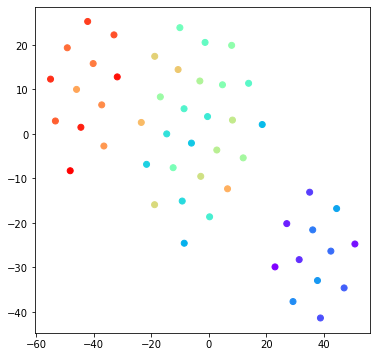

In [112]:
model = TSNE(n_components=2)
squeezed = model.fit_transform(x)

plt.figure(figsize=(6, 6))

colors = cm.rainbow(np.linspace(0, 1, x.shape[0]))

plt.scatter(squeezed[:,0],squeezed[:,1],color = colors)

plt.show()